In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [37]:
data = pd.read_csv('minute_weather.csv')


In [38]:
data.shape

(1587257, 13)

In [39]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [40]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [41]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [42]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [43]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [44]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [45]:
#Drop all the Rows with Empty rain_duration and rain_accumulation
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']


In [46]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [47]:
#How many rows did we drop ?
rows_before - rows_after

46

In [48]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [49]:
sampled_df.shape

(158680, 11)

In [50]:
#Select Features of Interest for Clustering
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [51]:
select_df = sampled_df[features]

In [52]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [53]:
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


In [54]:
#Scale the Features using StandardScaler
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [55]:
#Use k-Means Clustering
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [56]:
#What are the centers of 12 clusters we formed 
centers = model.cluster_centers_
centers

array([[ 0.70669974,  0.47090087,  0.29011687, -0.52550282,  0.47617778,
        -0.53129209, -0.76407864],
       [ 0.25290349, -0.9952336 ,  0.65796906, -0.54747045,  0.84841862,
        -0.53023766,  1.15701592],
       [-0.16442613,  0.86522599, -1.31115505, -0.58926054, -1.16703127,
        -0.60450519, -0.64161054],
       [ 1.19056248, -0.25357348, -1.15483359,  2.11737887, -1.05313266,
         2.23401422, -1.13492596],
       [-0.70974991,  0.52740256,  0.17317042, -0.58811803,  0.34337301,
        -0.60148518, -0.10513946],
       [-0.21645821,  0.62921119,  0.40831623,  0.7371329 ,  0.51629455,
         0.67478977, -0.14745256],
       [-1.18322224, -0.87411015,  0.446789  ,  1.98089978,  0.53855525,
         1.94236582,  0.91211621],
       [ 0.13177036,  0.83485734,  1.41584336, -0.64007954,  1.67999925,
        -0.59126146, -0.71353274],
       [ 0.23393512,  0.32032223,  1.88797338, -0.65187638, -1.55173681,
        -0.57675681, -0.28355091],
       [ 1.3657959 , -0.0823

In [57]:
#first create some utility functions which will help us in plotting graphs
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P


In [58]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [59]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.706700,0.470901,0.290117,-0.525503,0.476178,-0.531292,-0.764079,0
1,0.252903,-0.995234,0.657969,-0.547470,0.848419,-0.530238,1.157016,1
2,-0.164426,0.865226,-1.311155,-0.589261,-1.167031,-0.604505,-0.641611,2
3,1.190562,-0.253573,-1.154834,2.117379,-1.053133,2.234014,-1.134926,3
4,-0.709750,0.527403,0.173170,-0.588118,0.343373,-0.601485,-0.105139,4
5,-0.216458,0.629211,0.408316,0.737133,0.516295,0.674790,-0.147453,5
6,-1.183222,-0.874110,0.446789,1.980900,0.538555,1.942366,0.912116,6
7,0.131770,0.834857,1.415843,-0.640080,1.679999,-0.591261,-0.713533,7
8,0.233935,0.320322,1.887973,-0.651876,-1.551737,-0.576757,-0.283551,8
9,1.365796,-0.082341,-1.206127,-0.058383,-1.074378,-0.038516,-0.975471,9


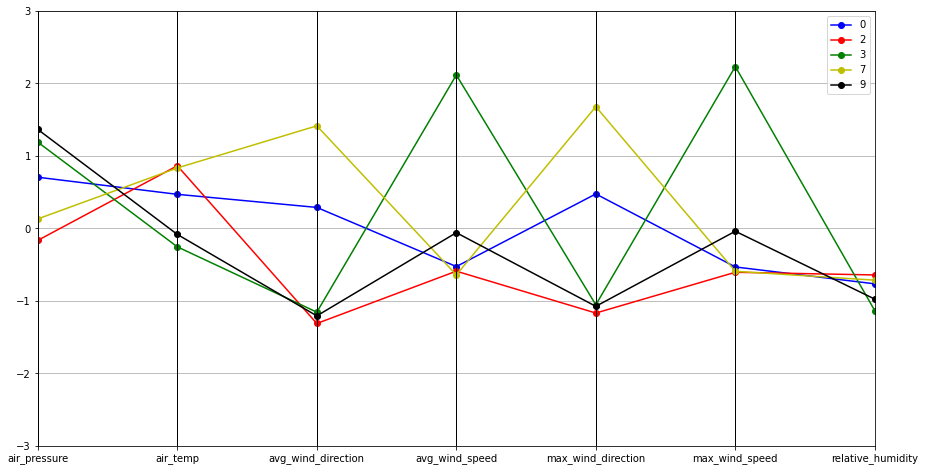

In [60]:
#Dry Days
parallel_plot(P[P['relative_humidity'] < -0.5])

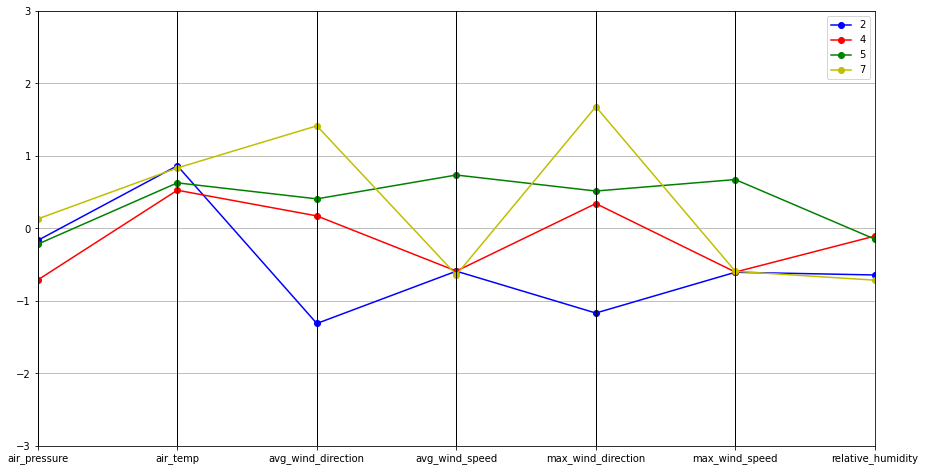

In [61]:
#Warm Days
parallel_plot(P[P['air_temp'] > 0.5])

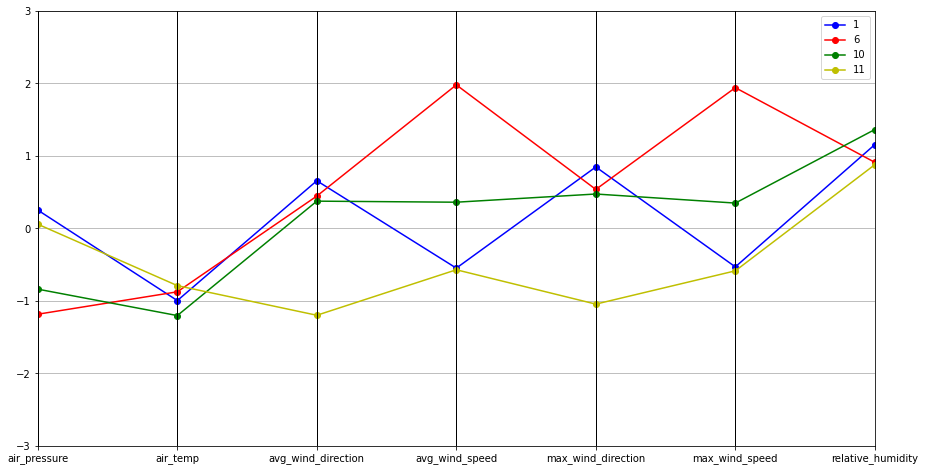

In [62]:
#Cool Days
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])